In [1]:
%pylab nbagg
%matplotlib notebook

import cma, mo
# Set parameters
dimension = 10
num_kernels = 5

list_of_solvers = mo.get_cmas(num_kernels * [dimension * [1]], 0.2)
moes = mo.Sofomore(list_of_solvers, reference_point = [11,11])



Populating the interactive namespace from numpy and matplotlib


In [3]:
fitness = mo.FitFun(cma.ff.sphere, lambda x: cma.ff.sphere(x-1))
g = lambda x: x[0] > 0.3
while not moes.stop():
#for i in range(100):
    solutions = moes.ask()
    objective_values = [fitness(x) for x in solutions]
    g_values = [g(x) for x in solutions]
    moes.tell(solutions, objective_values, [g_values])
#    moes.tell(solutions, objective_values)
    moes.disp()
    moes.logger.add()


Iterat #Fevals   Hypervolume   axis ratios   sigmas   min&max stds
                                  (median)  (median)    (median)
    2     20 1.330802086132605e+01 1.0e+00 2.00e-01  2e-01  2e-01
    3     30 1.330802086132605e+01 1.0e+00 1.93e-01  2e-01  2e-01
  100   1000 2.190059766852264e+01 2.1e+00 1.59e-01  1e-01  2e-01
  200   2000 5.589636919848486e+01 3.0e+00 1.72e-01  1e-01  2e-01
  300   3000 7.696658916017198e+01 3.5e+00 1.39e-01  1e-01  2e-01
  400   4000 8.462736761067268e+01 4.1e+00 1.06e-01  7e-02  2e-01
  500   5000 8.513245067997633e+01 4.5e+00 5.85e-02  4e-02  9e-02
  600   6000 8.655022965260380e+01 5.9e+00 9.41e-02  5e-02  2e-01
  700   7000 8.827249318396697e+01 6.8e+00 7.65e-02  4e-02  1e-01
  800   8000 8.937881574326708e+01 7.9e+00 4.74e-02  2e-02  6e-02
  900   9000 8.991791923333302e+01 7.5e+00 5.48e-02  2e-02  5e-02
 1000  10000 9.044471186739756e+01 7.5e+00 5.43e-02  1e-02  4e-02
 1100  11000 9.054563210192988e+01 1.0e+01 3.60e-02  5e-03  2e-02
 1200  120

 8200  56430 9.232557628899366e+01 7.0e+03 6.91e-05  2e-09  5e-06
 8200  56430 9.232557628899366e+01 7.0e+03 6.91e-05  2e-09  5e-06
 8200  56430 9.232557628899366e+01 7.0e+03 6.91e-05  2e-09  5e-06
 8200  56430 9.232557628899366e+01 7.0e+03 6.91e-05  2e-09  5e-06
 8300  56930 9.232557628899366e+01 7.0e+03 6.91e-05  2e-09  5e-06
 8300  56930 9.232557628899366e+01 7.0e+03 6.91e-05  2e-09  5e-06
 8300  56930 9.232557628899366e+01 7.0e+03 6.91e-05  2e-09  5e-06
 8300  56930 9.232557628899366e+01 7.0e+03 6.91e-05  2e-09  5e-06
 8400  57430 9.232557628899366e+01 7.0e+03 6.91e-05  2e-09  5e-06
 8400  57430 9.232557628899366e+01 7.0e+03 6.91e-05  2e-09  5e-06
 8400  57430 9.232557628899366e+01 7.0e+03 6.91e-05  2e-09  5e-06
 8400  57430 9.232557628899366e+01 7.0e+03 6.91e-05  2e-09  5e-06
 8500  57930 9.232557628899366e+01 7.0e+03 6.91e-05  2e-09  5e-06
 8500  57930 9.232557628899366e+01 7.0e+03 6.91e-05  2e-09  5e-06
 8500  57930 9.232557628899366e+01 7.0e+03 6.91e-05  2e-09  5e-06
 8500  579

In [14]:
moes.opts

{'archive': True,
 'verb_filenameprefix': 'outsofomore/',
 'verb_log': 1,
 'verb_disp': 100,
 'tell_order': None,
 'seed': 723100}

<IPython.core.display.Javascript object>


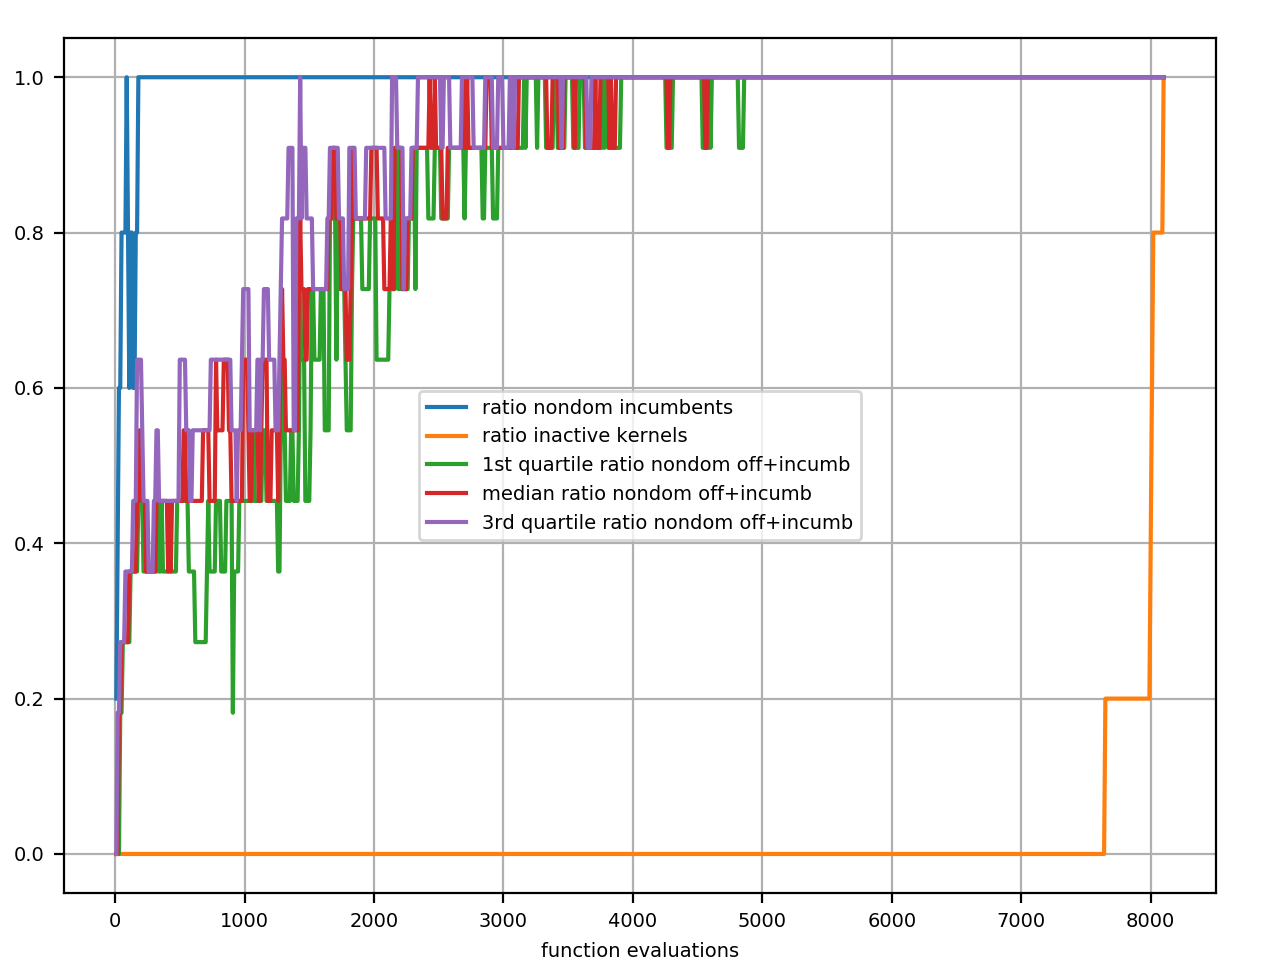

In [5]:
moes.logger.plot_ratios()

In [ ]:
iterat, countevals, res = moes.logger.load('outsofomore/ratio_nondom_offsp_incumb.dat')

In [ ]:
cma.plot('cma_kern')

In [ ]:
if moes.nda is None:
    moes.nda = BNDSL if len(objective_values[0]) == 2 else NDL
for i in range(len(moes._told_indices)):
    moes.kernels[moes._told_indices[i]].objective_values = objective_values[i]

if moes.reference_point is None:
    pass #write here the max among the kernel.objective_values       
moes.front = moes.nda([kernel.objective_values for kernel in moes.kernels],
                 moes.reference_point)



In [ ]:
ikernel, offspring = moes._offspring[0]

In [ ]:
start = len(moes._told_indices)

In [ ]:
print(start)

In [ ]:
kernel = moes.kernels[ikernel]
fit = kernel.objective_values
if fit in moes.front: # i.e. if fit is not dominated and dominates               # the reference point
    moes.front.remove(fit)

In [ ]:
hypervolume_improvements = [moes.front.hypervolume_improvement(
                    point) for point in objective_values[start:start+len(offspring)]]
moes.front.add(fit) # in case num_kernels > 1
            


In [ ]:
start

In [ ]:
constraints_values = [[g(x) for x in solutions]]

In [ ]:
g_values = [constraint[start:start+len(offspring)] \
            for constraint in constraints_values]
penalized_f_values = mo.RankPenalizedFitness([-float(u) for u in 
                    hypervolume_improvements], g_values)


In [5]:
import cma

In [6]:
cma.utilities.utils.ElapsedWCTime?

In [7]:
es = cma.CMAEvolutionStrategy(5 * [1], 0.2)

(4_w,8)-aCMA-ES (mu_w=2.6,w_1=52%) in dimension 5 (seed=774278, Wed Sep  4 15:30:05 2019)


In [8]:
es.optimize(cma.ff.sphere, iterations = 10)

Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1      8 3.665493425796476e+00 1.0e+00 2.17e-01  2e-01  3e-01 0:00.0
    2     16 2.151706599124098e+00 1.4e+00 3.05e-01  3e-01  4e-01 0:00.0
    3     24 1.380898342596616e+00 1.8e+00 4.09e-01  4e-01  5e-01 0:00.0


In [12]:
es.timer.elapsed

0.011320114135742188

In [13]:
es.timer.elapsed

0.011320114135742188